In [1]:
# pip install matplotlib seaborn

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


### Carregando os dados no notebook

In [3]:
# Abrir o JSON
with open('MX_category_id.json', encoding='latin1') as f:
    categorias = json.load(f)

# Extrair o nome das categorias
cat_list = categorias['items']
df_cat = pd.DataFrame([{
    'category_id': int(item['id']),
    'category_name': item['snippet']['title']
} for item in cat_list])

# Carregando o CSV (faça upload do arquivo antes)
df = pd.read_csv("/Users/ingridsabino/Documents/PortfolioDados/archive/MXvideos.csv", encoding='latin1')

# Juntar com os nomes de categoria
df = df.merge(df_cat, on='category_id', how='left')

# Usar 'category_name' diretamente!
df[['title', 'category_name', 'views']].head()

# Visualizar primeiras linhas
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,SbOwzAl9ZfQ,17.14.11,CapÃ­tulo 12 | MasterChef 2017,MasterChef 2017,24,2017-11-13T06:06:22.000Z,"MasterChef Junior 2017|""TV Azteca""|""recetas""|""...",310130,4182,361,1836,https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg,False,False,False,Disfruta la presencia del Chef Torreblanca en ...,Entertainment
1,klOV6Xh-DnI,17.14.11,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,Micky Contreras Martinez,22,2017-11-13T05:11:58.000Z,La Voz Mexico 7,104972,271,174,369,https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg,False,False,False,ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...,People & Blogs
2,6L2ZF7Qzsbk,17.14.11,LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA,El Pulso De La RepÃºblica,25,2017-11-13T17:00:02.000Z,"Chumel Torres|""El Pulso de la Republica""|""noti...",136064,10105,266,607,https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg,False,False,False,La canciÃ³n del principio se llama âEste esp...,News & Politics
3,hcY52MFWMDM,17.14.11,Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017,Casanare,25,2017-11-13T03:47:10.000Z,"temblor|""costa rica""|""sismo en costa rica""",96153,378,171,208,https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg,False,False,False,El video es de un Walmart en el pais centroame...,News & Politics
4,_OXDcGPVAa4,17.14.11,DOG HACKS | MUSAS LESSLIE LOS POLINESIOS,Musas,26,2017-11-13T19:17:48.000Z,"MUSAS|""lesslie""|""karen""|""hacks""|""perros""|""dogs...",499965,57781,681,7428,https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg,False,False,False,MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...,Howto & Style


### Tratamento de dados

In [4]:
# Ver info básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40451 entries, 0 to 40450
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40451 non-null  object
 1   trending_date           40451 non-null  object
 2   title                   40451 non-null  object
 3   channel_title           40451 non-null  object
 4   category_id             40451 non-null  int64 
 5   publish_time            40451 non-null  object
 6   tags                    40451 non-null  object
 7   views                   40451 non-null  int64 
 8   likes                   40451 non-null  int64 
 9   dislikes                40451 non-null  int64 
 10  comment_count           40451 non-null  int64 
 11  thumbnail_link          40451 non-null  object
 12  comments_disabled       40451 non-null  bool  
 13  ratings_disabled        40451 non-null  bool  
 14  video_error_or_removed  40451 non-null  bool  
 15  de

In [5]:
# Ver valores nulos
df.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               4224
category_name              252
dtype: int64

In [6]:
# Converter a data de trending
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [7]:
# Remover duplicatas
df.drop_duplicates(inplace=True)

## Análise exploratória


### Categorias mais populares 

Text(0.5, 1.0, 'Categorias mais frequentes')

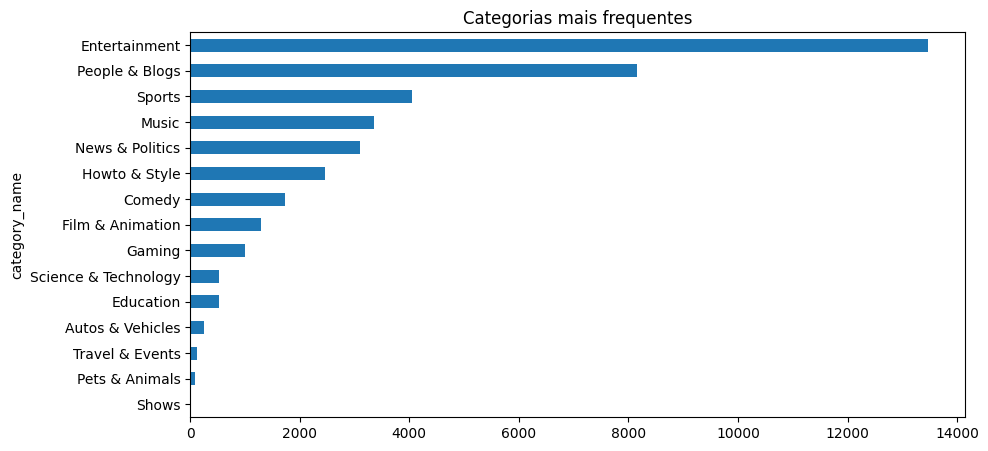

In [12]:
# df['category_name'].value_counts()
df['category_name'].value_counts(ascending=True).plot(kind='barh', figsize=(10, 5)).set_title('Categorias mais frequentes')



### Videos com mais visualizaçao

In [16]:
top_views = df.sort_values(by='views', ascending=False).head(10)
top_views[['title','channel_title', 'views']]

,title,channel_title,views
5261,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100912384
4998,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,75969469
3871,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,74789251
3604,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,66637636
35646,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,62796390
3396,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,56370607
4795,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,52611730
21833,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,50896717
23585,Maluma - El PrÃ©stamo (Official Video),MalumaVEVO,44726356
16715,To Our Daughter,Kylie Jenner,40801423


### Correlação entre likes, views e comentários

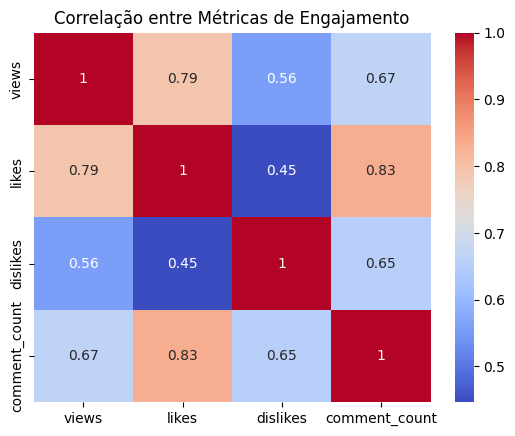

In [17]:

sns.heatmap(df[['views', 'likes', 'dislikes', 'comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre Métricas de Engajamento")
plt.show()

### Engajamento por categoria

In [23]:
# Criando uma métrica de engajamento: likes + comentários / views
df['engajamento'] = (df['likes'] + df['comment_count']) / df['views']

df.groupby('category_name')['engajamento'].mean().sort_values(ascending=False).head(10)
# df.groupby('category_name')['engajamento'].mean().sort_values(ascending=False).head(10).plot(kind='line', figsize=(10, 5)).set_title('Categorias mais frequentes')


category_name
Howto & Style           0.096023
Comedy                  0.082250
Travel & Events         0.079235
Music                   0.076879
Education               0.074293
Gaming                  0.072621
Autos & Vehicles        0.070930
Science & Technology    0.060445
Film & Animation        0.058507
Pets & Animals          0.052719
Name: engajamento, dtype: float64